<h2>IBM DP vs Sklearn</h2>

In [1]:
!pip install diffprivlib


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import math
import sklearn
import warnings
import numpy as np
import pandas as pd
import diffprivlib as dp
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from diffprivlib.models import LogisticRegression as diff_LogisticRegression
from diffprivlib.tools.utils import mean, var
from diffprivlib.models.k_means import KMeans as diff_KMeans

warnings.filterwarnings("ignore")

### SET YOUR ASU ID HERE
asu_id = 4025979478

In [3]:
df = pd.read_csv("california_housing.csv")

### Q1
For these questions
- Set total privacy budget to 100
- No bounds
- `random_state` should be set to your ASU ID
- Use the California Housing dataset

#### a.
Compute the actual mean ($m_1$) and DP mean ($m_2$) for the columns: `housingMedianAge`, `medianIncome`, and `medianHouseValue`. Vary `epsilon` from `.1` to `5`, increment by `.1` .  For each column, plot the squared error ($(m_1-m_2)^2$) against `epsilon`. Is there any trend?

SKLEARN RESULTS
Housing Median Age:  28.639486434108527
Median Income:  3.8706710029069766
median housing value:  206855.81690891474
------------
IBM DIFF RESULTS SAMPLE
Housing Median Age:  28.647902080077607
Median Income:  3.873063719567386
median housing value:  206935.8483819794


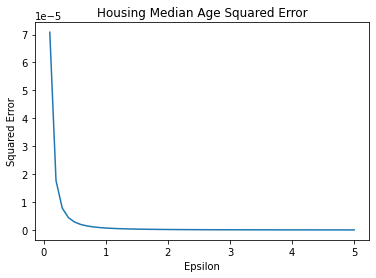

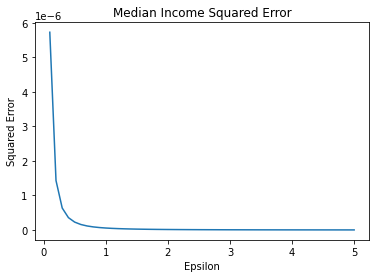

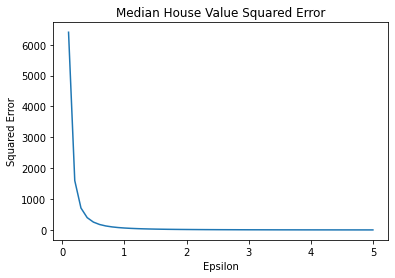

In [4]:
# M1 means
hma_m1 = np.mean(df['housingMedianAge'])
mi_m1 = np.mean(df['medianIncome'])
mhv_m1 = np.mean(df['medianHouseValue'])

print("SKLEARN RESULTS")
print("Housing Median Age: ",hma_m1)
print("Median Income: ",mi_m1)
print("median housing value: ", mhv_m1)

# create epsilon values for diff ibm function (0-5, .1 increments)
epsilon_range = np.arange(0.1, 5.1, 0.1)

# hma m2 vals mean
hma_m2 = []
mi_m2 = []
mhv_m2 = []


# calc for each epsilon
for x in epsilon_range:
    hma_m2.append(mean(df['housingMedianAge'],epsilon=x,bounds=None,random_state=asu_id, accountant=dp.BudgetAccountant(spent_budget=[(x,0)],epsilon=100)))
    mi_m2.append(mean(df['medianIncome'],epsilon=x,bounds=None,random_state=asu_id, accountant=dp.BudgetAccountant(spent_budget=[(x,0)],epsilon=100)))
    mhv_m2.append(mean(df['medianHouseValue'],epsilon=x,bounds=None,random_state=asu_id, accountant=dp.BudgetAccountant(spent_budget=[(x,0)],epsilon=100)))


print("------------")
print("IBM DIFF RESULTS SAMPLE")
print("Housing Median Age: ", hma_m2[0])
print("Median Income: ", mi_m2[0])
print("median housing value: ", mhv_m2[0])

# error arrays
hma_error = []
mi_error = []
mhv_error = []

# get error
x = 0
while x < len(mi_m2):
    hma_error.append((hma_m1-hma_m2[x])**2)
    mi_error.append((mi_m1-mi_m2[x])**2)
    mhv_error.append((mhv_m1-mhv_m2[x])**2)
    x+=1


# First plot
x_axis = np.array(epsilon_range)

y_axis = np.array(hma_error)

plt.plot(x_axis,y_axis)
plt.xlabel("Epsilon")
plt.ylabel("Squared Error")
plt.title("Housing Median Age Squared Error")
plt.show()

y_axis = np.array(mi_error)
plt.xlabel("Epsilon")
plt.ylabel("Squared Error")
plt.plot(x_axis,y_axis)
plt.title("Median Income Squared Error")
plt.show()

y_axis = np.array(mhv_error)
plt.xlabel("Epsilon")
plt.ylabel("Squared Error")
plt.plot(x_axis,y_axis)
plt.title("Median House Value Squared Error")
plt.show()



The trend is that for the higher the epsilon value goes, the smaller the squared error is for the mean between the sklearn function and the IBM DIFF mean function
- as epsilon increases squared error decreases
- once epsilon gets to around .3-.6 in value the rate at which the squared error changes greatly decreases. Showing diminishing returns around the range of 0.3 to 0.6 epsilon value

#### b.
Repeat the above for variance of the columns instead of mean.

SKLEARN VALUES
Housing Median Age:  158.3885861703583
Median Income m1:  3.60914768969746
median housing value m1:  13315503000.817923
------------
IBM DIFF VALUES
Housing Median Age:  157.55115883641858
Median Income m1:  3.5414529745598315
median housing value m1:  13239768487.46228


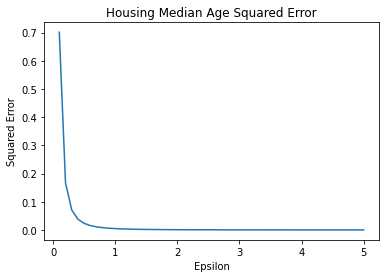

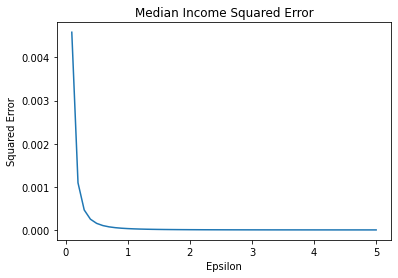

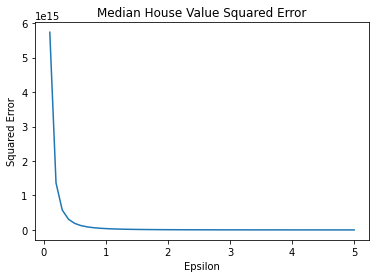

In [5]:
# V1
HMA_v1 = np.var(df['housingMedianAge'])
MI_v1 = np.var(df['medianIncome'])
MHV_v1 = np.var(df['medianHouseValue'])

#v2
hma_v2 = []
mi_v2 = []
mhv_v2 = []

print("SKLEARN VALUES")
print("Housing Median Age: ",HMA_v1)
print("Median Income m1: ",MI_v1)
print("median housing value m1: ", MHV_v1)

epsilon_range = np.arange(0.1, 5.1, 0.1)


# calc for each epsilon
for x in epsilon_range:
    hma_v2.append(var(df['housingMedianAge'],epsilon=x,bounds=None,random_state=asu_id, accountant=dp.BudgetAccountant(spent_budget=[(x,0)],epsilon=100)))
    mi_v2.append(var(df['medianIncome'],epsilon=x,bounds=None,random_state=asu_id,accountant=dp.BudgetAccountant(spent_budget=[(x,0)],epsilon=100)))
    mhv_v2.append(var(df['medianHouseValue'],epsilon=x,bounds=None,random_state=asu_id,accountant=dp.BudgetAccountant(spent_budget=[(x,0)],epsilon=100)))

# error arrays
hma_error = []
mi_error = []
mhv_error = []

# get error
x = 0
while x < len(mi_v2):
    hma_error.append((HMA_v1-hma_v2[x])**2)
    mi_error.append((MI_v1-mi_v2[x])**2)
    mhv_error.append((MHV_v1-mhv_v2[x])**2)
    x+=1

print("------------")
print("IBM DIFF VALUES")
print("Housing Median Age: ",hma_v2[0])
print("Median Income m1: ",mi_v2[0])
print("median housing value m1: ", mhv_v2[0])


# PLOT
# First plot

x_axis = np.array(epsilon_range)
y_axis = np.array(hma_error)
plt.plot(x_axis,y_axis)
plt.xlabel("Epsilon")
plt.ylabel("Squared Error")
plt.title("Housing Median Age Squared Error")
plt.show()

# second plot
y_axis = np.array(mi_error)
plt.plot(x_axis,y_axis)
plt.xlabel("Epsilon")
plt.ylabel("Squared Error")
plt.title("Median Income Squared Error")
plt.show()

# third plot
y_axis = np.array(mhv_error)
plt.plot(x_axis,y_axis)
plt.xlabel("Epsilon")
plt.ylabel("Squared Error")
plt.title("Median House Value Squared Error")
plt.show()


The trend is the same as before as the Epsilon value increases the squared error value decreases, when using the sklearn function for variance and the IBM diff variance function.
- The squared error value does decrease as Epsilon incincreases but the rate slows down at drastrically at around .4-.6 value for epsilon. 

### Q2
For these questions
- Set total privacy budget to 100 (using `BudgetAccountant` class)
- No bounds
- `random_state` should be set to your ASU ID
- Use the California Housing dataset

Use the k-means algorithm provided by `sklearn` and the IBM DP library referred above to cluster the California housing database. Use all columns except `longitude`
and `latitude` for clustering. Vary epsilon from .1 to 5 (increment by .1) and set the number of cluster to `8`. The quality of a cluster configuration, `q`, can be defined as $\sum_k \sum_i E_{i,k}$, where $E_{i,k}$ is the Euclidean distance between a cluster center $c_k$ and a point $x_{k,i}$ that belongs to that cluster.



For each value of $\epsilon$, compute the toal `q`  and plot them. Is there any trend? Compare them to the quality of the cluster configuration obtained from the regular K-means algorithm.

SKLEARN Q VALUE:  4929999.155129397
IBM Q VALUE Epsilon (minimum):  35187116.541349925


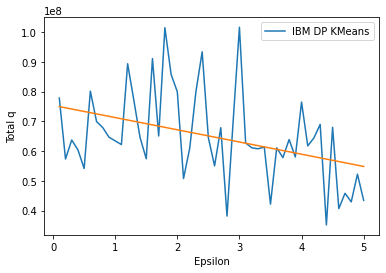

In [6]:
df = pd.read_csv("california_housing.csv")
#df.columns
df_temp = df

# drop columns we do not want
df_temp = df.drop(['longitude', 'latitude'], axis=1)

epsilon_range = np.arange(0.1, 5.1, 0.1)
#quality_congif_q

from sklearn.preprocessing import StandardScaler

#scaling the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_temp)

kmeans_sk = KMeans(n_clusters=8,random_state=asu_id).fit(data_scaled)
q_sklearn = np.sum(sklearn.metrics.euclidean_distances(data_scaled, kmeans_sk.cluster_centers_)**2)

kmeans_d_vals = []
q_values_ibm = []

# calc the kmean vals for the ibm diff version of the function
for x in epsilon_range:
    kmeans_ibm = diff_KMeans(n_clusters=8, epsilon=x, random_state=asu_id, accountant=dp.BudgetAccountant(spent_budget=[(x, 0)], epsilon=100))
    kmeans_ibm.fit(data_scaled)
    q_ibm = np.sum(sklearn.metrics.euclidean_distances(data_scaled, kmeans_ibm.cluster_centers_)**2)
    q_values_ibm.append(q_ibm)



# SKLEARN VALUES VS 1st IBM value ie; epsilon = 0.1
print("SKLEARN Q VALUE: ",q_sklearn)
print("IBM Q VALUE Epsilon (minimum): ", min(q_values_ibm))

# fit line to see whats happening
fit_coeffs = np.polyfit(epsilon_range,q_values_ibm,deg=1)
fit_line = np.polyval(fit_coeffs,epsilon_range)

# plot the values of the epsilon range
plt.plot(epsilon_range, q_values_ibm, label='IBM DP KMeans')
plt.plot(epsilon_range,fit_line, '-')
plt.legend()
plt.xlabel('Epsilon')
plt.ylabel('Total q')
plt.show()



In the above graph you can see that the value of Q declines (generally) with each iteration and vary of epsilon. Although the sklearns kmeans clustering does have a lower score, meaning that the IBM cluster is of lower quality but still has results even with a limited privacy budget. Still the sklearn version of the function does have better results when looking at the quality score.

#### Q3

In [7]:
df = pd.read_csv("adult_dataset.csv", sep=",", engine='python', names=["age", "workclass", "fnlwgt", "education",
                                                          "education-num", "marital status", "occupation",
                                                          "relationship", "race", "gender", "capital-gain",
                                                          "capital-loss", "hours-per-week", "native-country", "salary"])

For these questions
- Set total privacy budget to 100 (using `BudgetAccountant` class)
- No bounds
- `random_state` should be set to your ASU ID
- Use the Adult dataset (provided). Randomly sample 80% of the data points for training, the rest 20% for testing.

#### a.
Use the logistic regression classifier provided by `sklearn` and the IBM DP library referred above to classify salary class in the Adult dataset (using all other columns as predictors). Vary epsilon from .1 to 5 (increment by .1). 

- Compute and plot accuracy for different epsilon, is there any trend? Compare accuracy for different epsilon with the same for the regular classifier.
- Compute and plot precision for different epsilon, is there any trend? Compare precision for different epsilon with the same for the regular classifier.
- Compute and plot recall for different epsilon, is there any trend? Compare recall for different epsilon with the same for the regular classifier.

SKLEARN Accuracy Score:  0.8065704636168253
SKLEARN Precision Score:  0.7316176470588235
SKLEARN Recall Score:  0.26322751322751325
IBM Accuracy Score:  0.5965612526865214
IBM Precision Score:  0.27954545454545454
IBM Recall Score:  0.4880952380952381


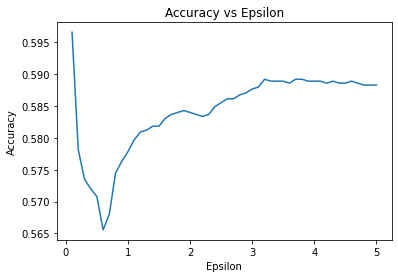

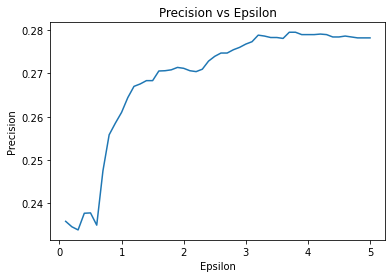

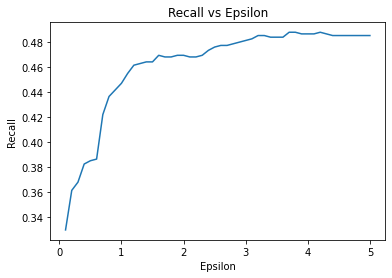

In [8]:
# create required epsilon range values
epsilon_range = np.arange(0.1, 5.1, 0.1)

# data frame handling
categorial_cols = ['workclass','education','marital status','occupation','relationship','race','gender','native-country','salary']
numerical = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week']

#print(df)
df_copy = df.copy()

# turn columns with string values into codes so they can be used for regression
for x in categorial_cols:
    df_copy[x] = df_copy[x].astype('category').cat.codes

# set the columns for the X and y
y = df_copy['salary']
X = df_copy.drop('salary',axis=1)

# SKLEARN LOGREG
X_train,X_test,y_train,y_test = sklearn.model_selection.train_test_split(X,y,test_size=0.2,random_state=asu_id)
lr = LogisticRegression(random_state=asu_id)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

# sklearn log-reg value scors
sklearn_a_score = sklearn.metrics.accuracy_score(y_test,y_pred)
skelarn_p_score = sklearn.metrics.precision_score(y_test, y_pred, pos_label=1)
sklearn_r_score = sklearn.metrics.recall_score(y_test,y_pred,pos_label=1)

# output the sklearn values for the logistic regression model
print("SKLEARN Accuracy Score: ", sklearn_a_score)
print("SKLEARN Precision Score: ", skelarn_p_score)
print("SKLEARN Recall Score: ", sklearn_r_score)

# score lists
dp_accuracy_scores = []
dp_precision_scores = []
dp_recall_scores = []

# calculate the values from the ibm diff log-reg function
for x in epsilon_range:
    dp_lr = diff_LogisticRegression(epsilon=x, random_state=asu_id, accountant=dp.BudgetAccountant(spent_budget=[(x, 1)], epsilon=100))
    dp_lr.fit(X_train,y_train)
    y_pred_dp = dp_lr.predict(X_test)
    dp_accuracy_scores.append(sklearn.metrics.accuracy_score(y_test,y_pred_dp))
    dp_precision_scores.append(sklearn.metrics.precision_score(y_test,y_pred_dp,pos_label=1))
    dp_recall_scores.append(sklearn.metrics.recall_score(y_test,y_pred_dp,pos_label=1))

print("IBM Accuracy Score: ", max(dp_accuracy_scores))
print("IBM Precision Score: ", max(dp_precision_scores))
print("IBM Recall Score: ", max(dp_recall_scores))
# function to make graphs...
def make_graph(e_range,scores,title,x_label,y_label):
    plt.plot(e_range,scores)
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

# plot graphs for each scoring
make_graph(e_range=epsilon_range,scores=dp_accuracy_scores,title="Accuracy vs Epsilon",x_label="Epsilon",y_label="Accuracy")
make_graph(e_range=epsilon_range,scores=dp_precision_scores,title="Precision vs Epsilon",x_label="Epsilon",y_label="Precision")
make_graph(e_range=epsilon_range,scores=dp_recall_scores,title="Recall vs Epsilon",x_label="Epsilon",y_label="Recall")

The graph for accuracy vs epsilon shows that as epsilon increases so does the accuracy of the model, as well as the other two graphs follow a simalar trend. Although in the graph "Recall vs Epsilon the score drops until around epsilon = ~ 1.8 and then sharply increases and the slowly increases. If you look at all the graphs they follow a simalar pattern where they have an area that the score greatly increases then increaes at a slower rate.